In [3]:
import control
import torch
import numpy as np
from torch.utils.data import DataLoader
from net_identification_utils import ControlLSTMInputs,\
    train,\
    test,\
    ControlDataset,\
    plot_discrete_output,\
    generate_data_for_rnn

In [6]:
system = control.TransferFunction(np.array([1, 0]), np.array([1, -7/12, 1/4, -1/24]), 1)

In [12]:
train_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [8]:
model = ControlLSTMInputs(
    window_size=100, layer_input_size=20, hidden_size=50, output_size=20, num_layers=2
)

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [31]:
train(model, 30, train_dataloader, torch.nn.MSELoss())

epoch 0, mse 0.00012095828058590996
epoch 1, mse 3.1677685228714836e-05
epoch 2, mse 4.1328412298753394e-05
epoch 3, mse 4.948609266648418e-05
epoch 4, mse 6.523745603772113e-05
epoch 5, mse 0.0002126923958530824
epoch 6, mse 0.00011452478179307946
epoch 7, mse 2.5503691877020173e-05
epoch 8, mse 2.452482664011768e-05
epoch 9, mse 2.3904930803837487e-05
epoch 10, mse 2.567511711276893e-05
epoch 11, mse 7.200865360573516e-05
epoch 12, mse 3.340168651448039e-05
epoch 13, mse 4.854079773394915e-05
epoch 14, mse 7.309391919079643e-05
epoch 15, mse 9.027165087900357e-05
epoch 16, mse 2.4298814187204697e-05
epoch 17, mse 1.3316910835783347e-05
epoch 18, mse 3.83480905838951e-05
epoch 19, mse 5.933982237365853e-05
epoch 20, mse 0.00010110028015333227
epoch 21, mse 6.706824510729347e-05
epoch 22, mse 1.868677095444582e-05
epoch 23, mse 1.2904651207463757e-05
epoch 24, mse 2.0532126882244484e-05
epoch 25, mse 2.5139156359728077e-05
epoch 26, mse 3.5202767639930245e-05
epoch 27, mse 4.5609965918

In [13]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [15]:
test(model, DataLoader(test_dataset, batch_size=10, shuffle=True), torch.nn.MSELoss())

3.575309485313483e-05

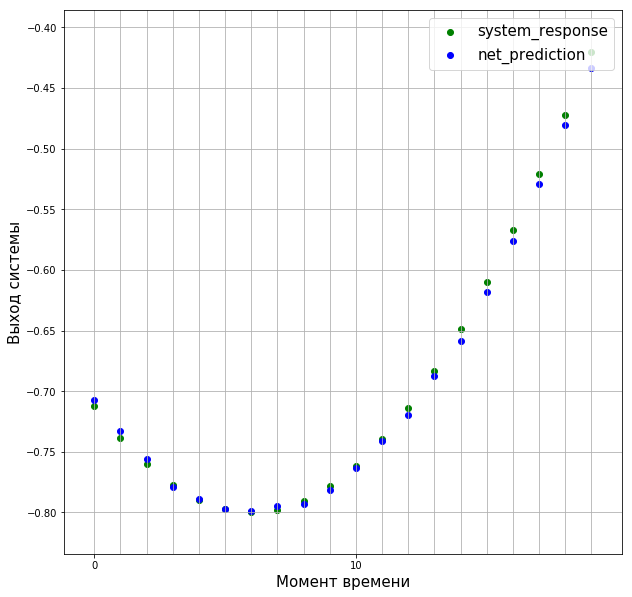

In [17]:
plot_discrete_output(
    system_response=test_dataset[1][1],
    net_prediction=model(test_dataset[1][0])
)
# test signal frequency not shifted relative to train signal

### concatenated prediction

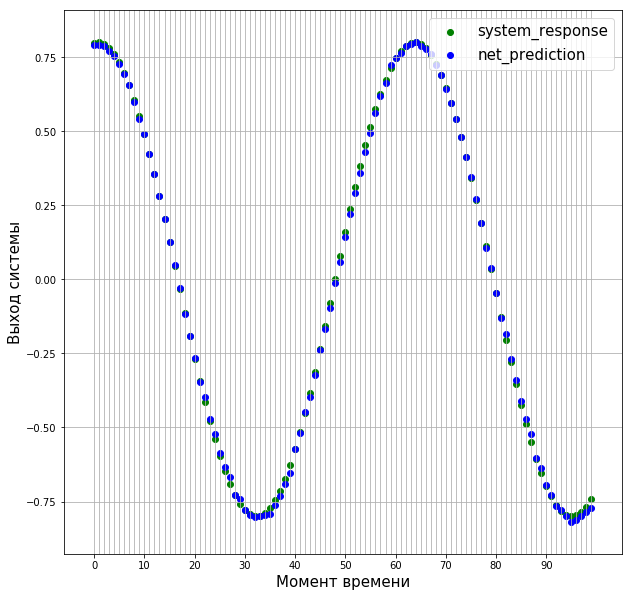

In [18]:
u = np.sin(np.arange(1000) * 0.1) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

###  prediction on input signal with shifted frequency relative to train data

In [34]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) / 2
)

In [35]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [36]:
test(model, test_dataloader, torch.nn.MSELoss())

0.042913356818919966

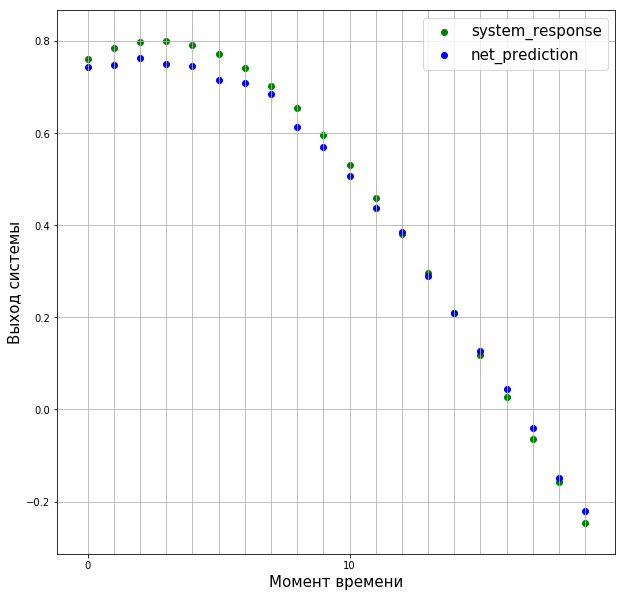

In [38]:
plot_discrete_output(
    system_response=test_dataset[0][1],
    net_prediction=model(test_dataset[0][0])
)

### concatenated prediction

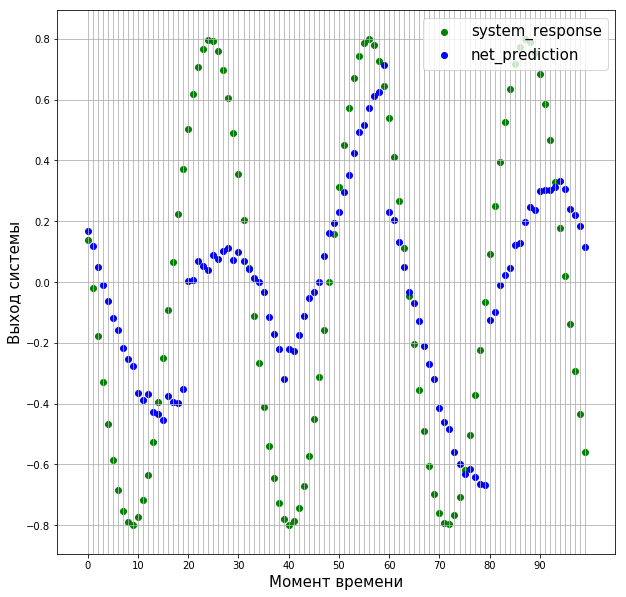

In [41]:
# frequency 0.2
u = np.sin(np.arange(1000) * 0.2) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

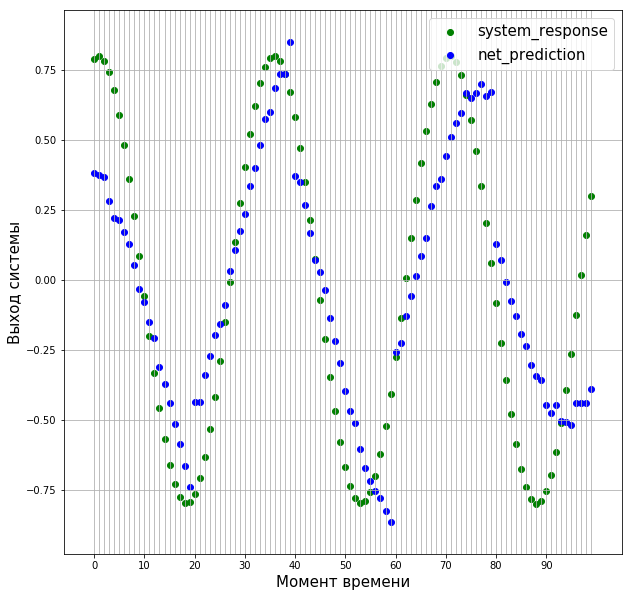

In [42]:
# frequency 0.18
u = np.sin(np.arange(1000) * 0.18) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

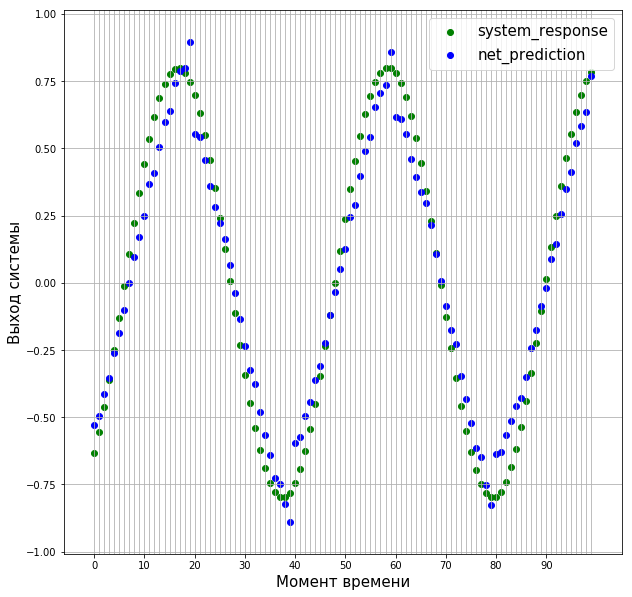

In [44]:
# frequency 0.15
u = np.sin(np.arange(1000) * 0.15) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

### sinus mixture as input

In [45]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,
    u_signal_generation_func=lambda x:
    (   # random mixture of two sinus with different frequencies
        np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) + 
        np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1))
    ) / 4
)

In [46]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [47]:
test(model, test_dataloader, torch.nn.MSELoss())

0.016315443272038464

### concatenated prediction

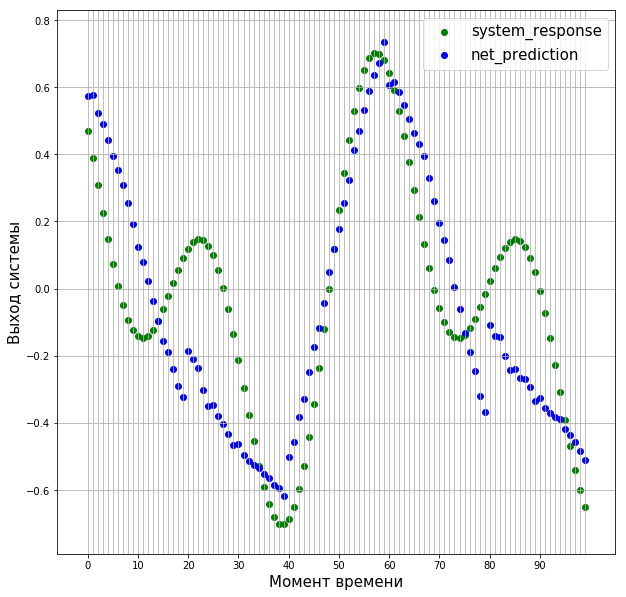

In [48]:
# mixture of sinuses with frequency 0.1 and 0.2
u = (np.sin(np.arange(1000) * 0.2) + np.sin(np.arange(1000) * 0.1)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

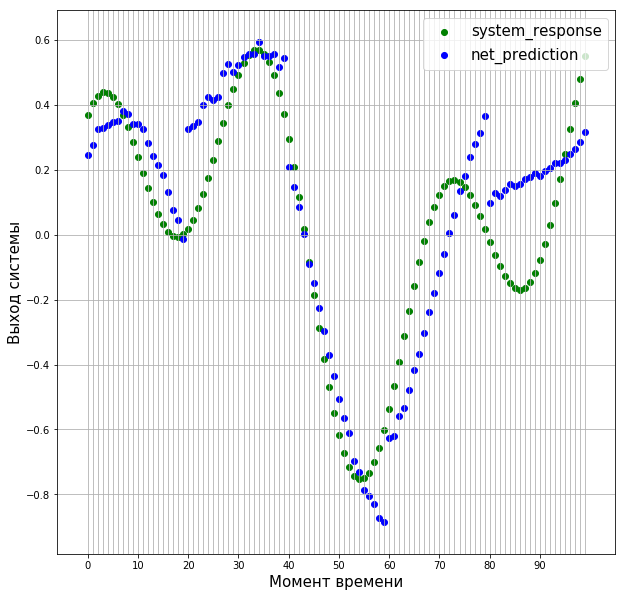

In [51]:
# mixture of sinuses with frequency 0.08 and 0.18
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

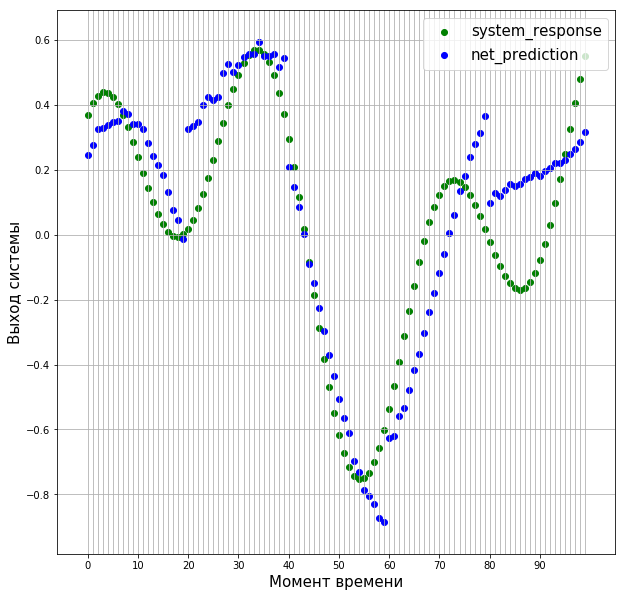

In [52]:
# mixture of sinuses with frequency 0.05 and 0.15
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

### magnitude increase

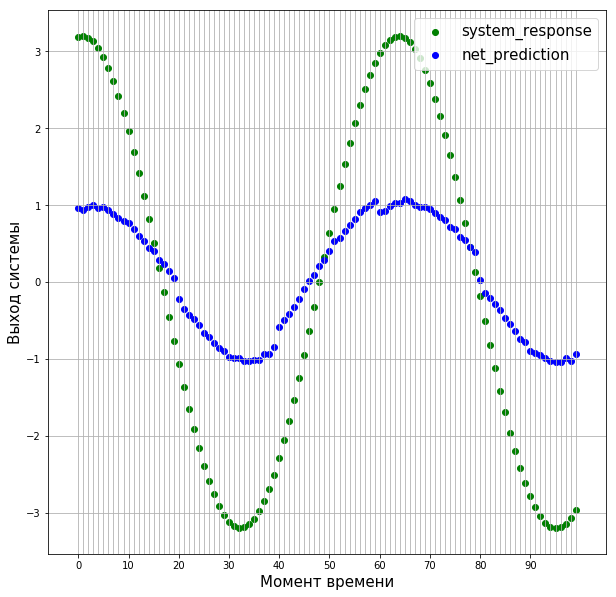

In [56]:
u = np.sin(np.arange(1000) * 0.1) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

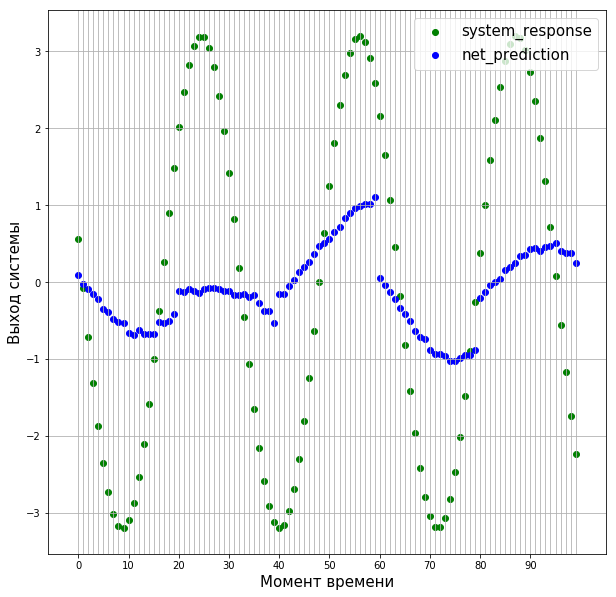

In [57]:
u = np.sin(np.arange(1000) * 0.2) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

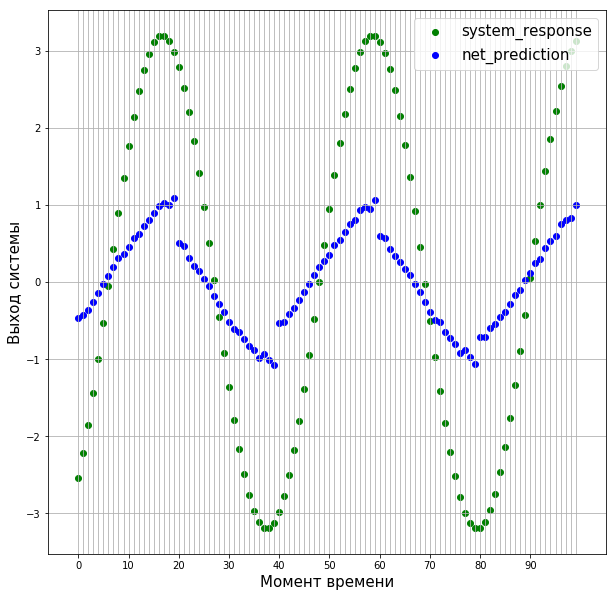

In [58]:
u = np.sin(np.arange(1000) * 0.15) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)